<a href="https://colab.research.google.com/github/ylyu1/python-coding-scripts/blob/main/trends_of_programming_languages_over_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the Data
Purpose: The analysis is to find out the over-time popularity of programming languages. 

Data source: Stackoverflow users'posts tagged with all the programming languages from 2008 to 2022.
https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com

Reference: https://www.udemy.com/course/100-days-of-code/learn/lecture/22387890#questions

## Import Pandas and Matplotlib

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

In [77]:
# import csv, rename the columns and peek at the data
df = pd.read_csv("QueryResults.csv", header=0, names=['DATE', 'TAG', 'POSTS'])
df.head(10)

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,506
4,2008-08-01 00:00:00,c++,164
5,2008-08-01 00:00:00,delphi,14
6,2008-08-01 00:00:00,java,222
7,2008-08-01 00:00:00,javascript,164
8,2008-08-01 00:00:00,perl,28
9,2008-08-01 00:00:00,php,159


In [22]:
# check the dimensions of the dataframe: 2328 rows, 3 columns
df.shape 

(2328, 3)

In [41]:
# check the number of posts by each language
df.groupby('TAG').sum()

,POSTS
TAG,
assembly,40839
c,382898
c#,1550110
c++,771718
delphi,49852
go,63121
java,1857463
javascript,2404441
perl,66960


## Data Cleaning


In [51]:
# The 'DATE' column all contains'00:00:00'. We want to check the data type of this column before doing any coversion. 
type(df['DATE'][1])

str

In [52]:
# change the data type of the column 'DATE' to 'datetime' can remove the '00:00:00'
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,506
4,2008-08-01,c++,164


## Data Manipulation



In [53]:
# the layout of the original dataframe
df

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,506
4,2008-08-01,c++,164
...,...,...,...
2323,2022-07-01,php,4751
2324,2022-07-01,python,25633
2325,2022-07-01,r,4519
2326,2022-07-01,ruby,488


In [29]:
# convert the categories of languages to columns with the pivot method 
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,506.0,164.0,14.0,NaN,222.0,164.0,28.0,159.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,318.0,1647.0,753.0,104.0,NaN,1133.0,637.0,130.0,477.0,537.0,6.0,287.0,NaN
2008-10-01,15.0,303.0,1989.0,809.0,112.0,NaN,1150.0,724.0,127.0,612.0,508.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1732.0,734.0,141.0,NaN,957.0,581.0,97.0,501.0,452.0,1.0,159.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-01,251.0,2101.0,6473.0,3841.0,134.0,828.0,8099.0,16327.0,105.0,3763.0,24548.0,5083.0,528.0,2069.0
2022-04-01,266.0,1875.0,5947.0,3855.0,122.0,756.0,7853.0,16004.0,101.0,3819.0,23606.0,4778.0,494.0,1772.0
2022-05-01,288.0,1917.0,6316.0,3912.0,129.0,680.0,7892.0,16138.0,94.0,4035.0,23235.0,4856.0,502.0,1761.0


In [55]:
# check the dimensions of the reshaped dataframe
reshaped_df.shape

(169, 14)

In [94]:
# check the column names
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [64]:
# By counting the number of non-NaN values for each column, we can see that some languages does not have posts in certain months. Those values are NaN.
reshaped_df.count()

TAG
assembly      169
c             169
c#            169
c++           169
delphi        169
go            169
java          169
javascript    169
perl          169
php           169
python        169
r             169
ruby          169
swift         169
dtype: int64

In [78]:
# Instead of dropping the rows with NaN values, we refill the NaN values with 0 and keep this change to the reshaped dataframe.
reshaped_df.fillna(0, inplace=True)
# check if there is any NaN value in the dataframe. No NaN values means the the dataframe has kept the change. 
reshaped_df.isna().values.any()

False

## Data Visualization


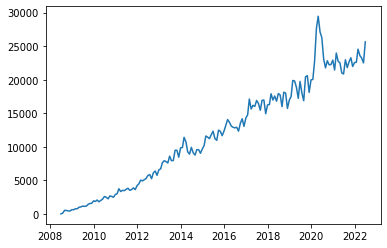

In [79]:
# plot a line chart with data from 'python'; x-axis: date, y-axis: the number of posts on python
plt.plot(reshaped_df.index, reshaped_df.python)

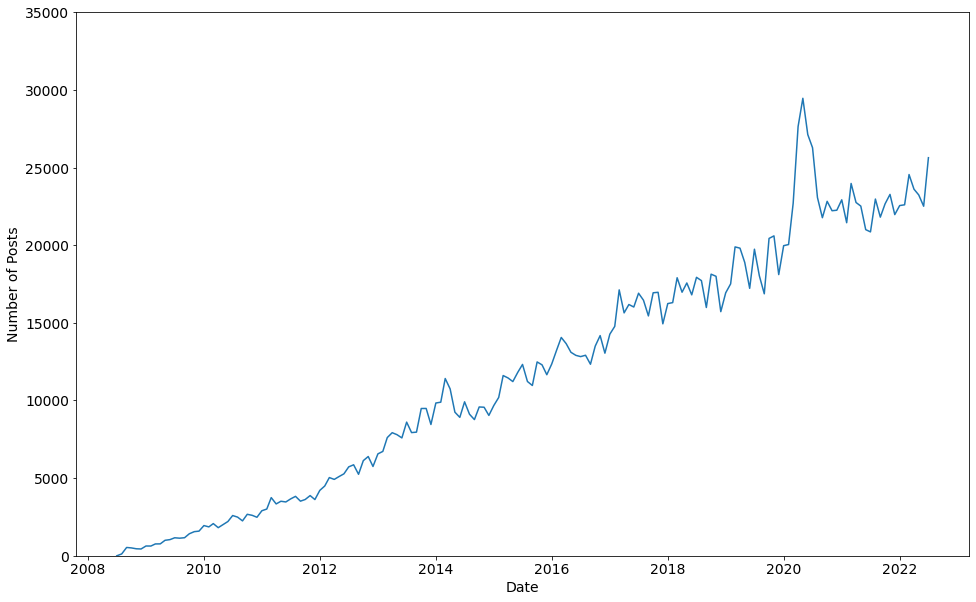

In [112]:
# The above plot is too small. Let's make some optimizations.
# increase the figure size(width and height)
plt.figure(figsize=[16,10])
# increase the fontsize of tick labels on x and y-axis
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# add labels on x and y-axis and set fontsize
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
# set the limit of y-axis to remove the under zero part
plt.ylim(0, 35000)
# plot the formatted graph
plt.plot(reshaped_df.index, reshaped_df.python)

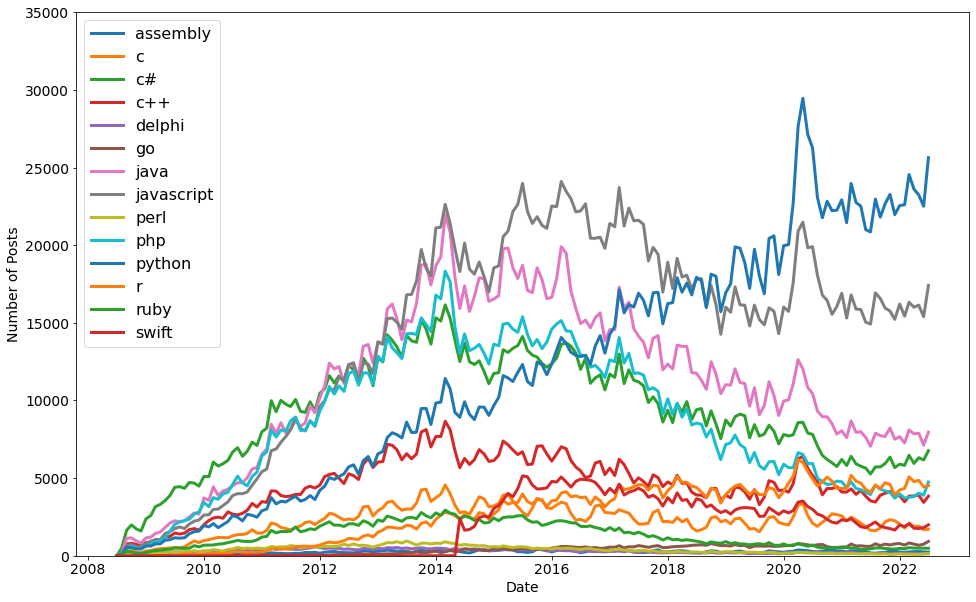

In [102]:
# use For Loops to create multiple line charts for all the programming languages
# first need to set all the formats same as above
plt.figure(figsize=[16,10])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# then use the For Loops to plot the charts, set linewidth and labels for the figure legend
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)

# add a figure legend, set the legend label size
plt.legend(fontsize=16)

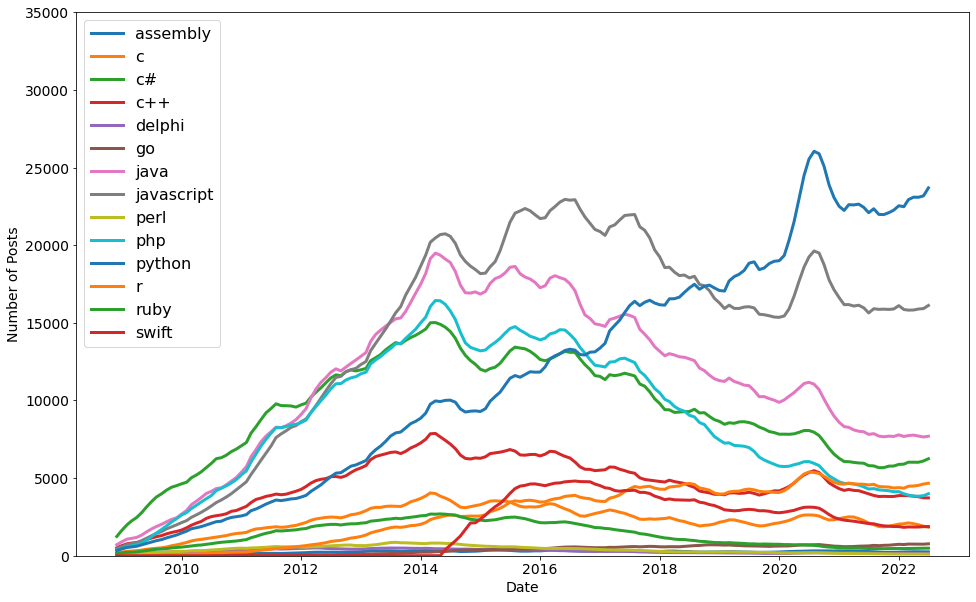

In [111]:
# soothing out the data by  the means of every 6 months data. This can reduce the weird spikes in the above charts)
roll_df = reshaped_df.rolling(window=6).mean()

# same as previously for plotting the charts
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
  plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)

We can see from the charts that python is the only language that is keeping popular. Javascript is the second popular langugage that was surpassed by python after 2019.
Java, php, c# are losing popularity after late 2014 but are still top popular languages. R, c++, c, perl etc are less popular among all the languages. Swift has popularity after late 2014 as it was released by Apple in October 2014. 
Interestingly, there is an increased popularity in almost all the programing languages around 2020-2021. We don't know the reason just based on this dataset. One guess can be that this trend is correlated with the COVID-19 pandamic. Remote jobs, including jobs working with programming languages can get many attentions from people who want to take the opportunities. 